In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob2
import json
from tqdm import tqdm
from read_imu import *
plt.style.use('seaborn-bright')

# Reading the IMU data

In [2]:
df = read_file()
df['Trial_num'] = df['Trial_num'].astype(int)

100%|██████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:44<00:00, 25.80it/s]


# IMU data visualization
### Note:

Assuming the LED light is not directly facing upward, but facing away from the subject

If the acc_y is < -0.2, the orientation should be correct (usb port facing to wrist)

if the acc_y is > 0.2 the orientation should be incorrect (usb port facing to elbow)

### Gesture: 

(1) Wrist and finger extension

(2) Fist

### Subject profiles checked by video recorded during gesture (Subject; hand used; sensor orientation)
Subject 0100; Right hand; Session1 non-flipped, session2 flipped

Subject 0001; Right hand; Session1 non-flipped, session2 non-flipped

Subject 1001; Right hand; Session1 flipped, session2 flipped

Subject 1002; Left hand; Session1 flipped, session2 flipped

Subject 1003; Left hand; Session1 flipped, session2 flipped

Subject 1004; Right hand; Session1 flipped, session2 flipped

Subject 1005; Right hand; Session1 non-flipped, session1 non-flipped

Subject 1006; Left hand; Session1 non-flipped, session2 non-flipped

Subject 1007; Right hand; Session1 non-flipped, session2 non-flipped

Subject 1008; Left hand; Session1 flipped, session2 non-flipped

Subject 1111; Right hand; Session1 flipped, session2 flipped

Subject 1234; Right hand; Session1 flipped, session2 flipped

Subject 9999; Right hand; Session1 non-flipped, session2 non-flipped

Subject 9998; Right hand; Session1 non-flipped, session2 flipped

Subject 0009; Right hand; Session1 non-flipped, session2 non-flipped

Subject 0010; Right hand; Session1 non-flipped, session2 non-flipped

Subject 0011; Right hand; Session1 non-flipped, session2 non-flipped

Subject 0012; Right hand; Session1 non-flipped, session2 non-flipped

# Wrist and finger extension

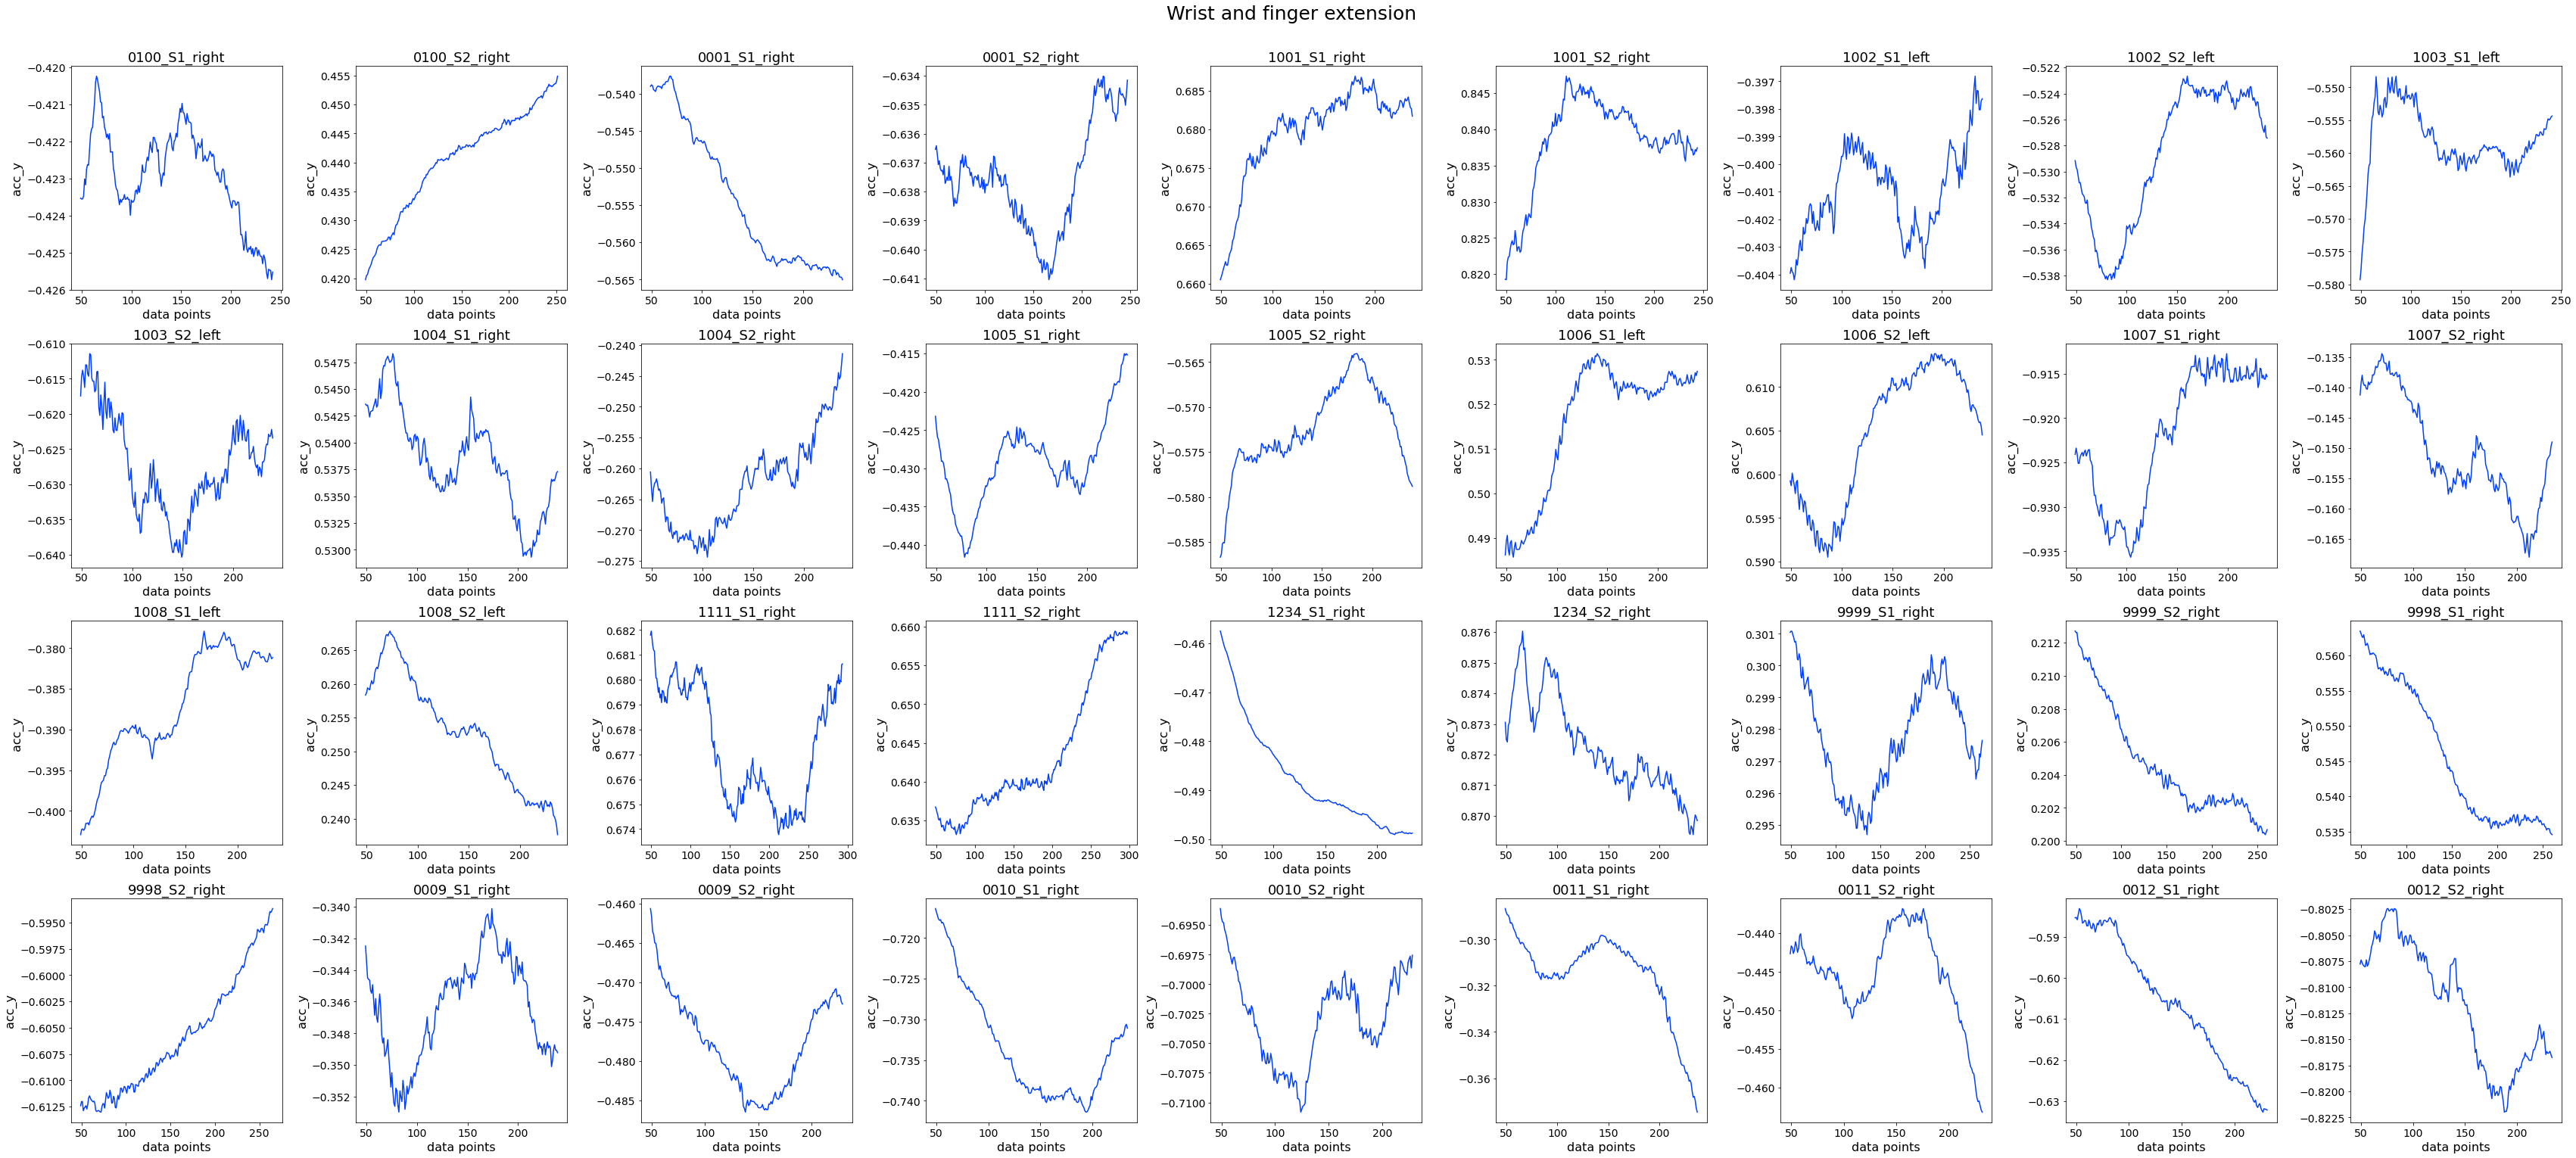

In [30]:
fig, ax = plt.subplots(4, 9, figsize = (21 * (9 / 4), 21))

C = 0
R = 0
for subject in ['0100', '0001', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', 
               '1111', '1234', '9999', '9998', '0009', '0010', '0011', '0012']:
    
    for session in ['S1', 'S2']:
        acc_y_subject = df[(df['ID'] == subject) & 
                           (df['Trial_num'] == 3) & 
                           (df['Gesture'] == '8') &
                           (df['session'] == session)]['acc_y']
        
        site = df[df['ID'] == subject]['Site'].unique()[0] 
        if len(acc_y_subject) == 0:
            print(f'No matching gesture for {subject}')
        pd.Series(acc_y_subject).rolling(50).mean().plot(ax = ax[R, C])
        ax[R, C].set_title(f'{subject}_{session}_{site}', fontsize = 18)
        ax[R, C].set_ylabel('acc_y', fontsize = 16)
        ax[R, C].set_xlabel('data points', fontsize = 16)
        ax[R, C].tick_params(axis='both', which='major', labelsize=14)
        C += 1
        if C ==9:
            C =0
            R +=1
            
fig.suptitle('Wrist and finger extension', fontsize = 25, y = 1.01)
plt.tight_layout()
# plt.savefig('Wrist and finger extension_IMU.png')

# Errors made using Wrist and finger extension

1004_S2, 1234_S1, 9999_S1, 9999_S2, 9998_S1, 9998_S2

# Cylinder grasp

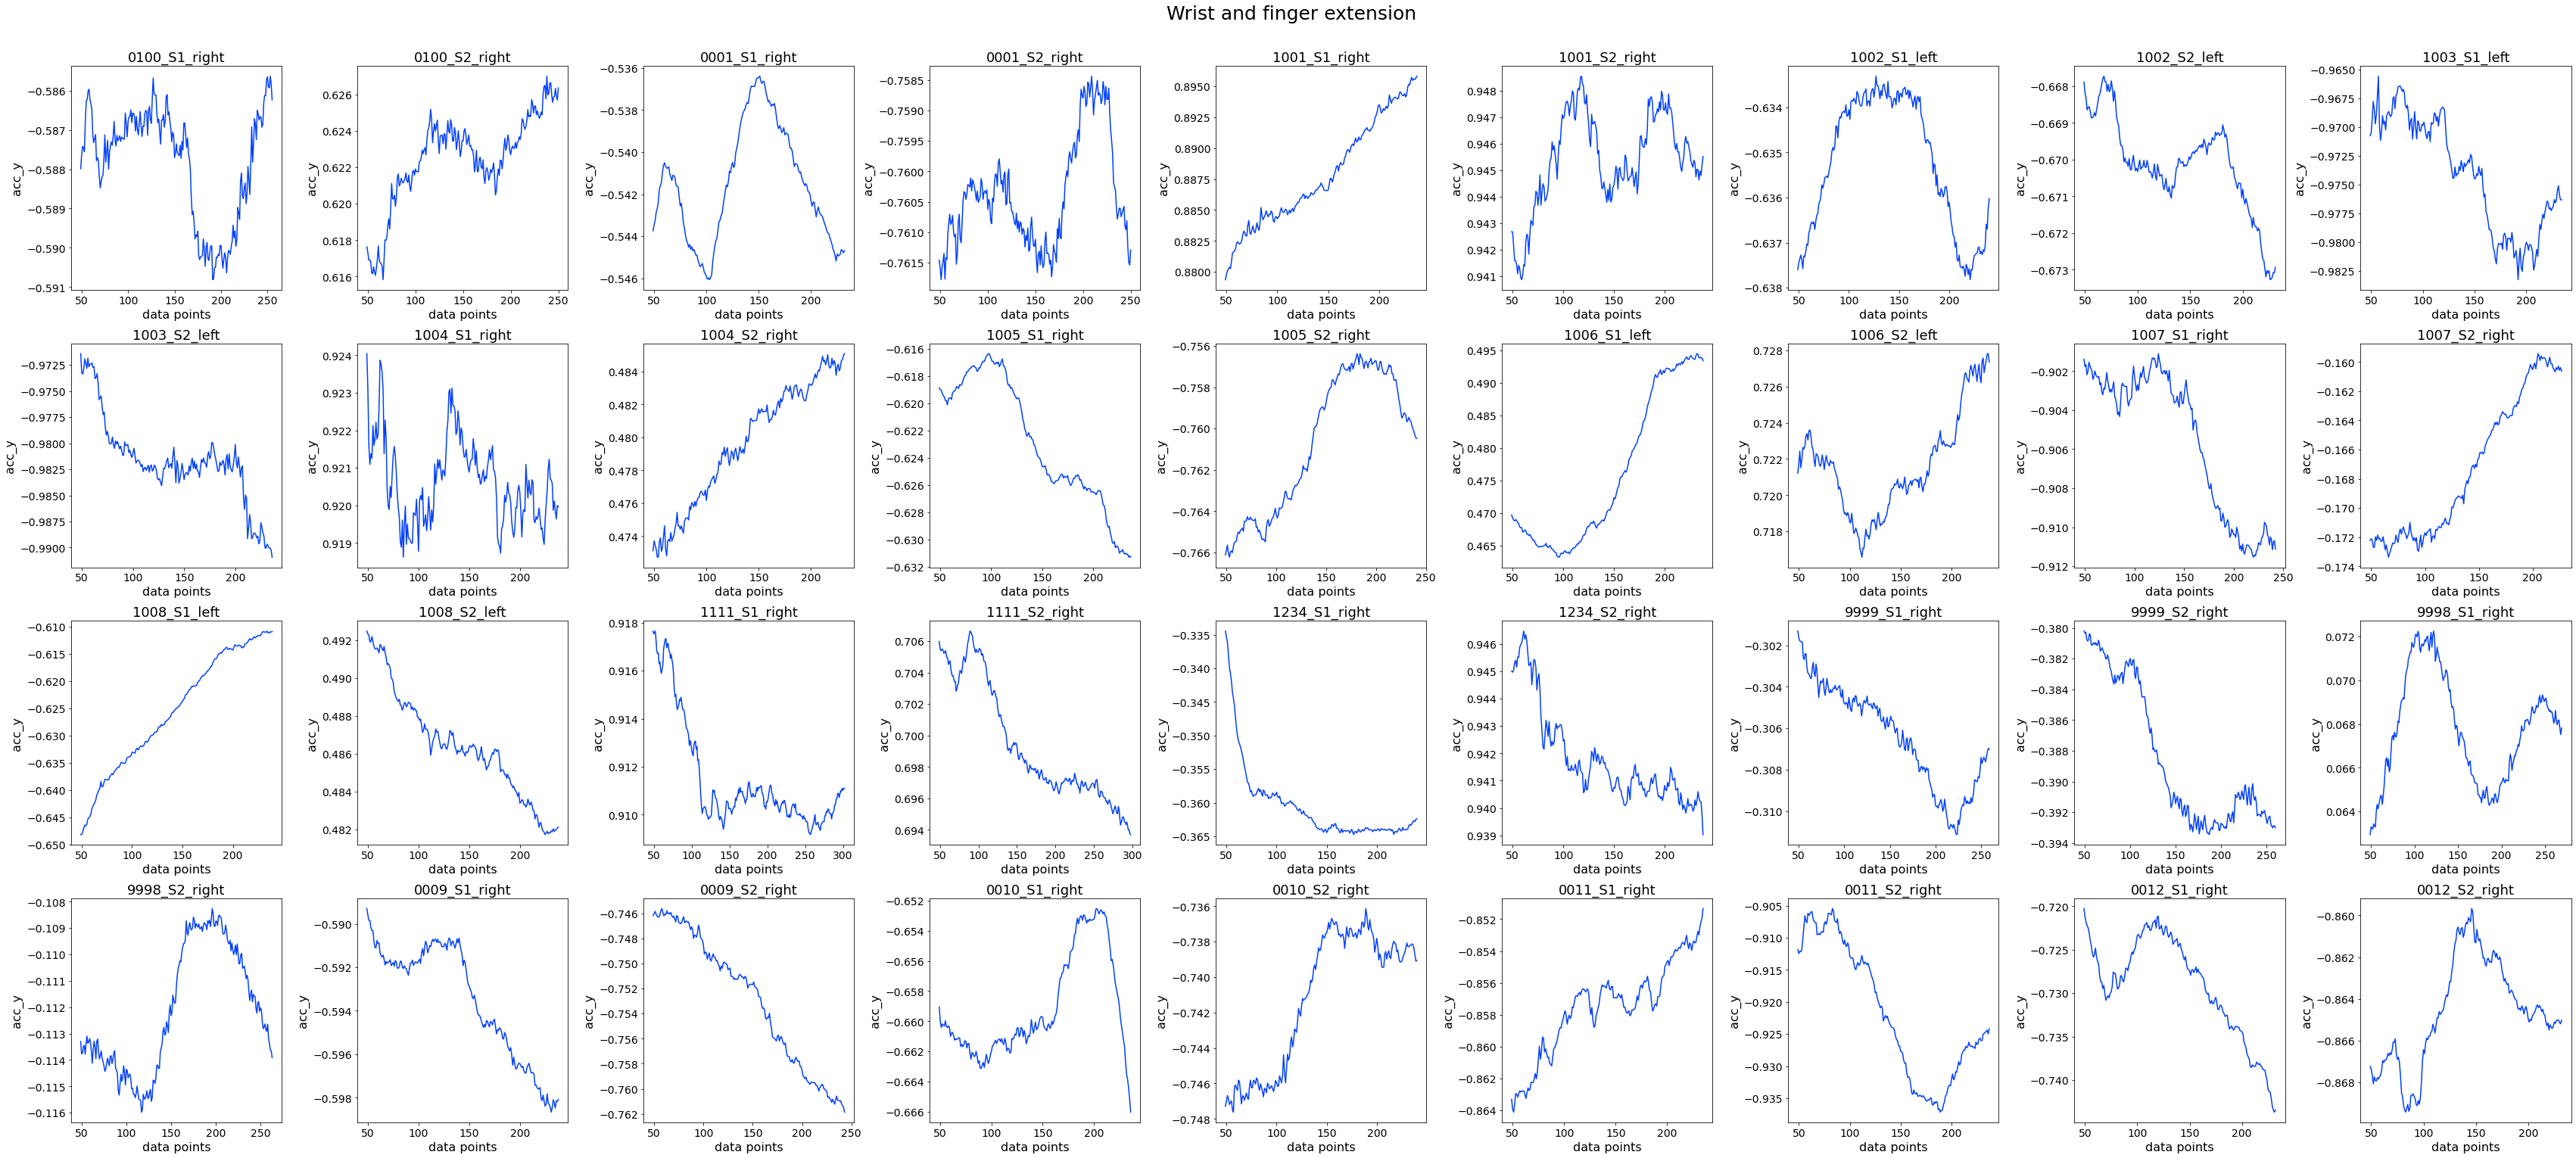

In [24]:
fig, ax = plt.subplots(4, 9, figsize = (21 * (9 / 4), 21))

C = 0
R = 0
for subject in ['0100', '0001', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', 
               '1111', '1234', '9999', '9998', '0009', '0010', '0011', '0012']:
    
    for session in ['S1', 'S2']:
        acc_y_subject = df[(df['ID'] == subject) & 
                           (df['Trial_num'] == 3) & 
                           (df['Gesture'] == '2') &
                           (df['session'] == session)]['acc_y']
        
        site = df[df['ID'] == subject]['Site'].unique()[0]
        if len(acc_y_subject) == 0:
            print(f'No matching gesture for {subject}')
        pd.Series(acc_y_subject).rolling(50).mean().plot(ax = ax[R, C])
        ax[R, C].set_title(f'{subject}_{session}_{site}', fontsize = 18)
        ax[R, C].set_ylabel('acc_y', fontsize = 16)
        ax[R, C].set_xlabel('data points', fontsize = 16)
        ax[R, C].tick_params(axis='both', which='major', labelsize=14)
        C += 1
        if C ==9:
            C =0
            R +=1
            
fig.suptitle('Wrist and finger extension', fontsize = 25, y = 1.01)
plt.tight_layout()
# plt.savefig('Cylinder Grasp.png')

# Errors made using Wrist and finger extension

1234_S1

# Summary

### Using Wrist and finger extension
For subject 1004, 1007 and 1234, the IMU data (acc_y) is prone to make error and they were exactly the ones who required rotation adjustment between two sessions decided by the correlation. It means that the rotation could be an issue because if the sensor (channel4) is rotated to the location where it is directly facing upward, the acc_y is not reliable. 

For subject 9999 and 9998, the sensor does not require rotation adjustment between two sessions. However, the sensor (channel4) was placed close to location where it is facing directly upward. 

### Using Cylinder grasp
One one error was made because the cylinder grasp is done in neutral position, so the sensor (channel4) has higher chance to face outward. However, for people who required rotation adjustment or those who placed the sensor (channel4) directly facing upward, the acc_y values are less decisive.